In [1]:
import numpy as np
np.random.seed(0)
import mltools as ml
import matplotlib.pyplot as plt

# Processing the Data

In [2]:
import csv
Xtr = []
Ytr = []
check = []
with open("C:\\Users\\gtgst\\Downloads\\newEyeData.csv", "r") as f:
    reader = csv.reader(f)
    i = next(reader)
    
    for row in reader:
        if(row[0] != ""):
            Ytr.append(int(float(row[0])))
        for item in range(1, len(row)):
            if(row[0] != ""):

                check.append(int(row[item]))

        if(check != []):
            Xtr.append(check)

        check = []

        

# Splitting the data into training and validation

In [3]:
Xva = Xtr[41343:55125]
Yva = Ytr[41343:55125]
Xtr = Xtr[0:41342]
Ytr = Ytr[0:41342]


# Performing KNN on the data with K = 1,2,5,10,50,100,200.  The best KNN seemed to be around 200 judging from the chart below but overall the performance was very poor which is why we decided to do linear regression instead.

In [5]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=50)
neigh.fit(Xtr, Ytr) 



KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=50, p=2,
                     weights='uniform')

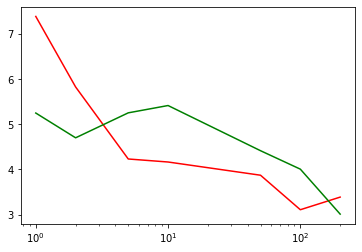

In [18]:
from sklearn.neighbors import KNeighborsClassifier

K=[1,2,5,10,50,100,200];
errTrain = [None]*len(K)
errVal = [None]*len(K)
Yhat = []
Yvahat = []

for index, k in enumerate(K):
    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xtr, Ytr) 
    
    for i in range(len(Xtr)):
        Yhat.append(neigh.predict([Xtr[i]])[0])

    errTrain[index]= sum(np.subtract(x1, x2)**2 for (x1, x2) in zip(Ytr, Yhat))/(len(Ytr)+len(Yhat))

    neigh = KNeighborsClassifier(n_neighbors=k)
    neigh.fit(Xva, Yva)
    
    for i in range(len(Xva)):
        Yvahat.append(neigh.predict([Xva[i]])[0])

    errVal[index] = sum(np.subtract(x1, x2)**2 for (x1, x2) in zip(Yva, Yvahat))/(len(Yva)+len(Yvahat))
    Yvahat = []
    Yhat = []

    
plt.semilogx(K, errTrain, 'r-', label='Training')
plt.semilogx(K, errVal, 'g-', label='Validation')

